In [1]:
import os
import sys

module_path = os.path.abspath(os.path.join('../..'))

if module_path not in sys.path:
    sys.path.append(module_path)

# <center>Machine Learning Report</center>
### <center>Donato Meoli</center>

<center>Machine Learning course 654AA</center>
<center>Academic year: 2019/2020</center>

<center>Type of project: A with Computational Mathematics</center>

## Abstract

***YASE*** (Yet Another Sklearn Extension) is a custom reimplementation of *Support Vector Machines* and *Deep Neural Networks*, both with some of the most successful features according to the state of art.

This work was motivated by the possibility of being able to solve the optimization problem deriving from the mathematical formalization of these models through a wide range of optimization algorithms object of study and developed for the Computational Mathematics course.

The scope of this report excludes the implementation details but is just to show the results over the *Monk's* classification problem and the *Grid Search* results over **ML-CUP19** regression problem. The latter refers to an academic competition within the Machine Learning course for which a **MEE** of **0.75** was achieved using a **Support Vector Regression** with **Laplacian kernel**.

The choice to train a SVM rather than a neural network was dictated by my personal fascination about the possibility of formalizing a *Box-Constrained Quadratic* optimization problem, which represents the core problem of a *Support Vector Machine*, as a *Quadratic* (unconstrained) optimization problem through its *Dual* formulation as a *Lagrangian* relaxation which allows solving the problem with other optimization algorithms.

For performance and efficiency reasons, the training phase over ML-CUP19 during the grid search was done with a custom reimplementation of the Platt's *Sequential Minimization Optimization* algorithm which is the best-known way to train a SVM since it breaks up the original large BCQP problem into a series of smallest possible problems, which are then solved analytically.

## Monk's Problem

### Support Vector Classifier

In [2]:
from yase.ml.utils import load_monk
from yase.ml.svm import SVC

from sklearn.metrics import classification_report

#### Monk #1

In [3]:
X_train, X_test, y_train, y_test = load_monk(1)

svc = SVC(kernel='poly', degree=3, gamma='scale', verbose=5)
svc.fit(X_train, y_train)
print(classification_report(y_test, svc.predict(X_test)))

iter	f(x)
   0	-1.3103e+01
   5	-1.5372e+01
  10	-1.5373e+01
  15	-1.5650e+01
  20	-1.5653e+01
  25	-1.5653e+01

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       216
         1.0       1.00      1.00      1.00       216

    accuracy                           1.00       432
   macro avg       1.00      1.00      1.00       432
weighted avg       1.00      1.00      1.00       432



#### Monk #2

In [4]:
X_train, X_test, y_train, y_test = load_monk(2)

svc = SVC(kernel='poly', C=1000, degree=2, gamma='scale', verbose=5)
svc.fit(X_train, y_train)
print(classification_report(y_test, svc.predict(X_test)))

iter	f(x)
   0	-1.2859e+02
   5	-3.4749e+02
  10	-3.6481e+02
  15	-3.6638e+02
  20	-3.6654e+02
  25	-3.6655e+02
  30	-3.6655e+02
  35	-3.6655e+02

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       290
         1.0       1.00      1.00      1.00       142

    accuracy                           1.00       432
   macro avg       1.00      1.00      1.00       432
weighted avg       1.00      1.00      1.00       432



#### Monk #3

In [5]:
X_train, X_test, y_train, y_test = load_monk(3)

svc = SVC(kernel='poly', C=100, degree=4, gamma='auto', verbose=5)
svc.fit(X_train, y_train)
print(classification_report(y_test, svc.predict(X_test)))

iter	f(x)
   0	-2.4690e+03
   5	-2.5680e+03
  10	-2.6527e+03
  15	-2.6544e+03

              precision    recall  f1-score   support

         0.0       0.95      0.99      0.97       204
         1.0       0.99      0.95      0.97       228

    accuracy                           0.97       432
   macro avg       0.97      0.97      0.97       432
weighted avg       0.97      0.97      0.97       432



### Neural Network Classifier

#### Monk #1

epoch	f(x)	
   0	7.8107e-01	val_loss: 7.1015e-01	acc: 0.4505	val_acc: 0.5385
  10	6.6378e-01	val_loss: 6.1405e-01	acc: 0.6126	val_acc: 0.5385
  20	6.1086e-01	val_loss: 5.6210e-01	acc: 0.6847	val_acc: 0.6923
  30	5.6478e-01	val_loss: 4.9439e-01	acc: 0.7207	val_acc: 0.9231
  40	5.1678e-01	val_loss: 4.0174e-01	acc: 0.8468	val_acc: 1.0000
  50	4.7487e-01	val_loss: 3.0876e-01	acc: 0.8378	val_acc: 1.0000
  60	4.4004e-01	val_loss: 2.4724e-01	acc: 0.8559	val_acc: 1.0000
  70	4.0445e-01	val_loss: 2.1792e-01	acc: 0.8559	val_acc: 1.0000
  80	3.6640e-01	val_loss: 1.9264e-01	acc: 0.8559	val_acc: 1.0000
  90	3.2258e-01	val_loss: 1.7533e-01	acc: 0.8739	val_acc: 1.0000
 100	2.7738e-01	val_loss: 1.5513e-01	acc: 0.9279	val_acc: 1.0000
 110	2.3712e-01	val_loss: 1.3873e-01	acc: 0.9730	val_acc: 1.0000
 120	2.0419e-01	val_loss: 1.1230e-01	acc: 0.9730	val_acc: 1.0000
 130	1.7580e-01	val_loss: 7.7791e-02	acc: 0.9820	val_acc: 1.0000
 140	1.5142e-01	val_loss: 5.5438e-02	acc: 0.9820	val_acc: 1.0000
 150	1.3247e-

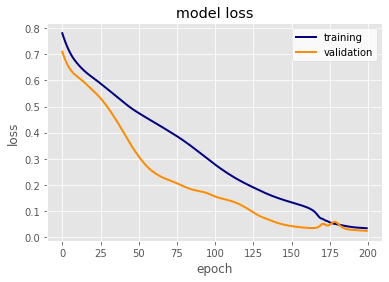

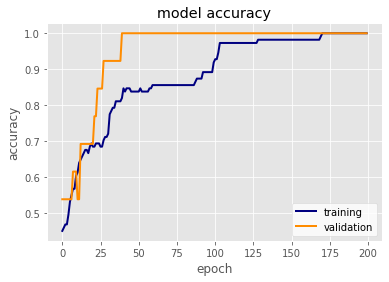

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       216
         1.0       1.00      1.00      1.00       216

    accuracy                           1.00       432
   macro avg       1.00      1.00      1.00       432
weighted avg       1.00      1.00      1.00       432



In [4]:
from yase.ml.neural_network.activations import sigmoid, tanh
from yase.ml.neural_network.layers import FullyConnected
from yase.ml.neural_network.losses import binary_cross_entropy
from yase.ml.neural_network import NeuralNetworkClassifier
from yase.ml.utils import load_monk, plot_model_accuracy, plot_model_loss

from yase.optimization.unconstrained.stochastic import Adam

from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = load_monk(1)

net = NeuralNetworkClassifier((FullyConnected(17, 4, tanh),
                               FullyConnected(4, 4, tanh),
                               FullyConnected(4, 1, sigmoid)),
                              loss=binary_cross_entropy, optimizer=Adam, 
                              learning_rate=0.01, max_iter=200, verbose=10)
net.fit(X_train, y_train)
plot_model_loss(net.loss_history)
plot_model_accuracy(net.accuracy_history)
print(classification_report(y_test, net.predict(X_test)))

#### Monk #2

epoch	f(x)	
   0	7.4515e-01	val_loss: 8.0832e-01	acc: 0.4605	val_acc: 0.3529
  10	6.4758e-01	val_loss: 6.5715e-01	acc: 0.6184	val_acc: 0.6471
  20	6.0368e-01	val_loss: 6.5366e-01	acc: 0.6645	val_acc: 0.6471
  30	4.5871e-01	val_loss: 5.4233e-01	acc: 0.7434	val_acc: 0.6471
  40	3.7646e-01	val_loss: 5.2386e-01	acc: 0.7829	val_acc: 0.7647
  50	3.4511e-01	val_loss: 5.7982e-01	acc: 0.7895	val_acc: 0.7647
  60	3.2120e-01	val_loss: 5.6999e-01	acc: 0.8224	val_acc: 0.7059
  70	2.5738e-01	val_loss: 4.5839e-01	acc: 0.8947	val_acc: 0.7647
  80	1.9039e-01	val_loss: 3.7729e-01	acc: 0.9276	val_acc: 0.7647
  90	1.4084e-01	val_loss: 2.8741e-01	acc: 0.9474	val_acc: 0.8235
 100	3.0012e-02	val_loss: 5.9846e-02	acc: 1.0000	val_acc: 1.0000
 110	1.3190e-02	val_loss: 1.3050e-02	acc: 1.0000	val_acc: 1.0000
 120	8.0739e-03	val_loss: 8.3229e-03	acc: 1.0000	val_acc: 1.0000
 130	6.0758e-03	val_loss: 6.1582e-03	acc: 1.0000	val_acc: 1.0000
 140	5.0269e-03	val_loss: 5.0365e-03	acc: 1.0000	val_acc: 1.0000
 150	4.3551e-

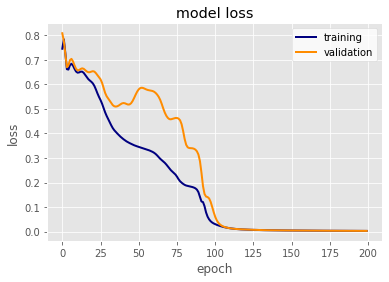

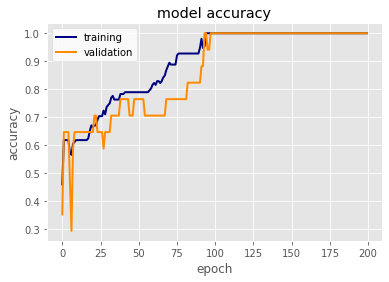

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       290
         1.0       1.00      1.00      1.00       142

    accuracy                           1.00       432
   macro avg       1.00      1.00      1.00       432
weighted avg       1.00      1.00      1.00       432



In [5]:
from yase.ml.neural_network.activations import sigmoid, softmax
from yase.ml.neural_network.layers import FullyConnected
from yase.ml.neural_network.losses import sparse_categorical_cross_entropy
from yase.ml.neural_network import NeuralNetworkClassifier
from yase.ml.utils import load_monk, plot_model_accuracy, plot_model_loss

from yase.optimization.unconstrained.stochastic import Adam

from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = load_monk(2)

net = NeuralNetworkClassifier((FullyConnected(17, 5, sigmoid),
                               FullyConnected(5, 2, softmax)),
                              loss=sparse_categorical_cross_entropy, optimizer=Adam, 
                              learning_rate=0.2, max_iter=200, verbose=10)
net.fit(X_train, y_train)
plot_model_loss(net.loss_history)
plot_model_accuracy(net.accuracy_history)
print(classification_report(y_test, net.predict(X_test)))

#### Monk #3

epoch	f(x)	
   0	4.2000e-01	val_loss: 3.9377e-01	acc: 0.4128	val_acc: 0.3077
  10	1.3948e-01	val_loss: 6.1056e-02	acc: 0.9266	val_acc: 1.0000
  20	1.0294e-01	val_loss: 2.4140e-02	acc: 0.9450	val_acc: 1.0000
  30	9.2763e-02	val_loss: 1.4972e-02	acc: 0.9450	val_acc: 1.0000
  40	8.7971e-02	val_loss: 2.5656e-02	acc: 0.9450	val_acc: 1.0000
  50	8.3680e-02	val_loss: 1.5280e-02	acc: 0.9358	val_acc: 1.0000
  60	7.6634e-02	val_loss: 1.1047e-02	acc: 0.9450	val_acc: 1.0000
  70	6.0581e-02	val_loss: 7.9059e-02	acc: 0.9358	val_acc: 0.9231
  80	3.4008e-02	val_loss: 7.6368e-03	acc: 0.9817	val_acc: 1.0000
  90	2.4306e-02	val_loss: 1.4691e-03	acc: 0.9817	val_acc: 1.0000
 100	1.8996e-02	val_loss: 8.8576e-04	acc: 0.9817	val_acc: 1.0000
 110	6.9368e-03	val_loss: 1.4176e-03	acc: 1.0000	val_acc: 1.0000
 120	3.8323e-03	val_loss: 2.0037e-03	acc: 1.0000	val_acc: 1.0000
 130	2.3548e-03	val_loss: 1.2465e-03	acc: 1.0000	val_acc: 1.0000
 140	1.6367e-03	val_loss: 7.8754e-04	acc: 1.0000	val_acc: 1.0000
 150	1.2977e-

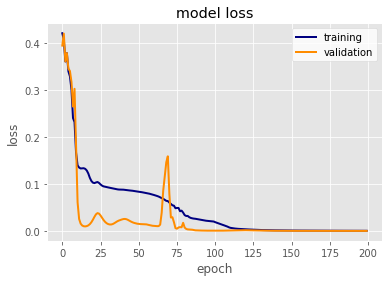

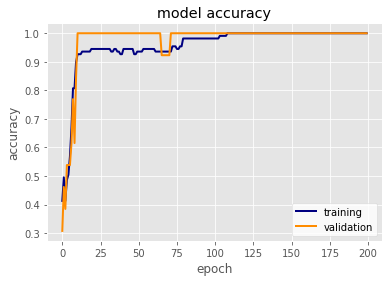

              precision    recall  f1-score   support

         0.0       0.91      0.98      0.94       204
         1.0       0.98      0.91      0.95       228

    accuracy                           0.94       432
   macro avg       0.95      0.95      0.94       432
weighted avg       0.95      0.94      0.94       432



In [15]:
from yase.ml.neural_network.activations import tanh, softmax
from yase.ml.neural_network.layers import FullyConnected
from yase.ml.neural_network.losses import categorical_cross_entropy
from yase.ml.neural_network import NeuralNetworkClassifier
from yase.ml.neural_network.regularizers import L2
from yase.ml.utils import load_monk, plot_model_accuracy, plot_model_loss

from yase.optimization.unconstrained.stochastic import Adam

from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = load_monk(3)
y_train = OneHotEncoder(sparse=False).fit_transform(y_train.reshape(-1, 1))

net = NeuralNetworkClassifier((FullyConnected(17, 4, tanh, coef_reg=L2(1e-5), inter_reg=L2(1e-5)),
                               FullyConnected(4, 4, tanh, coef_reg=L2(1e-5), inter_reg=L2(1e-5)),
                               FullyConnected(4, 2, softmax, coef_reg=L2(1e-5), inter_reg=L2(1e-5))),
                              loss=categorical_cross_entropy, optimizer=Adam,
                              learning_rate=0.2, max_iter=200, verbose=10)
net.fit(X_train, y_train)
plot_model_loss(net.loss_history)
plot_model_accuracy(net.accuracy_history)
print(classification_report(y_test, net.predict(X_test)))

## ML-CUP19

In [3]:
import numpy as np

from yase.ml.utils import load_ml_cup, mean_euclidean_error, load_ml_cup_blind, plot_validation_curve, plot_learning_curve
from yase.ml.svm import SVR

from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.multioutput import MultiOutputRegressor

X, y = load_ml_cup()

gamma_range = [1e-8, 1e-6, 1e-4, 1e-2, 1]
C_range = [0.1, 1, 10, 100, 1000, 1500, 2000, 2500]
epsilon_range = [0.0001, 0.001, 0.1, 0.2, 0.3]

tuned_parameters = {'estimator__kernel': ['rbf', 'laplacian'],
                    'estimator__epsilon': epsilon_range,
                    'estimator__C': C_range,
                    'estimator__gamma': gamma_range}

grid = GridSearchCV(MultiOutputRegressor(SVR()), 
                    param_grid=tuned_parameters,
                    scoring=make_scorer(mean_euclidean_error, greater_is_better=False),
                    cv=5,  # 5 fold cross validation
                    n_jobs=-1,  # use all processors
                    refit=True,  # refit the best model on the full dataset
                    verbose=True)
grid.fit(X, y)
print(f'best parameters: {grid.best_params_}')
print(f'best score: {-grid.best_score_}')

Fitting 5 folds for each of 400 candidates, totalling 2000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   15.9s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   33.1s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done 2000 out of 2000 | elapsed:  8.0min finished


best parameters: {'estimator__C': 100, 'estimator__epsilon': 0.001, 'estimator__gamma': 1e-08, 'estimator__kernel': <function laplacian_kernel at 0x7f8b7fa5d3a0>}
best score: 0.7489511761793546


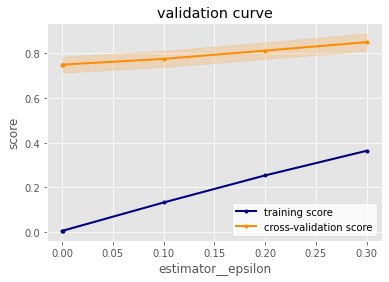

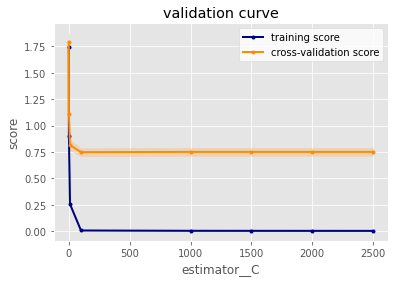

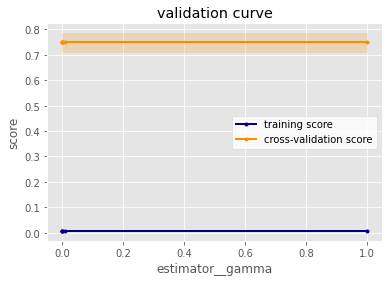

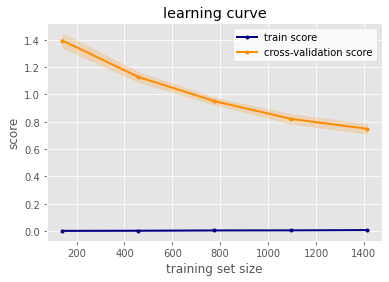

In [2]:
scorer = make_scorer(mean_euclidean_error)

# plot validation curve to visualize the performance metric over a
# range of values for some hyperparameters (C, gamma, epsilon, etc.)
plot_validation_curve(grid.best_estimator_, X, y, 'estimator__epsilon', epsilon_range, scorer)
plot_validation_curve(grid.best_estimator_, X, y, 'estimator__C', C_range, scorer)
plot_validation_curve(grid.best_estimator_, X, y, 'estimator__gamma', gamma_range, scorer)

# plot learning curve to visualize the effect of the
# number of observations on the performance metric
plot_learning_curve(grid.best_estimator_, X, y, scorer)

# save predictions on the blind test set
np.savetxt('yase/ml/data/ML-CUP19/dmeoli_ML-CUP19-TS.csv', grid.predict(load_ml_cup_blind()), delimiter=',')